# Time series analysis of Climate 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

train=pd.read_csv('DailyDelhiClimateTrain.csv',index_col='date', parse_dates=True)
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
date_rng = pd.date_range(start='1/1/2013', end='1/03/2017', freq='D')

type(date_rng[0])
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['meantemp'] = None

# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
t.head()

,meantemp
date,
2013-01-01,None
2013-01-02,None
2013-01-03,None
2013-01-04,None
2013-01-05,None


In [3]:
train.shape

(1462, 4)

<AxesSubplot:xlabel='date'>

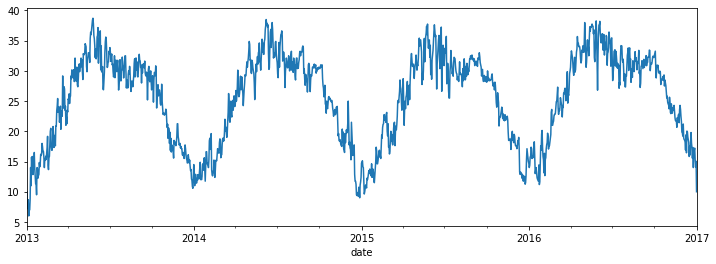

In [4]:
train['meantemp'].plot(figsize=(12,4))

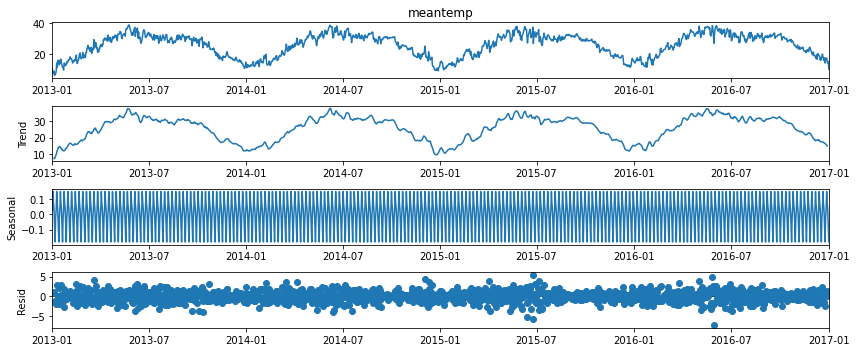

In [5]:
ets_result = seasonal_decompose(train['meantemp'], model='additive')
rcParams['figure.figsize'] = (12,5)
ets_result.plot();

# Augmented Dickey Fuller Test for Stationarity of Data

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def check_adfuller(train):
    result = adfuller(train)
    labels = ['adf value', 'p-value', '# lags', '# observation']
    out = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        out['critical '+key]=val
    
    print(out)
    
    if(result[1] <= 0.05):
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
check_adfuller(train['meantemp'])

adf value          -2.021069
p-value             0.277412
# lags             10.000000
# observation    1451.000000
critical 1%        -3.434865
critical 5%        -2.863534
critical 10%       -2.567832
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
from pmdarima import auto_arima

In [10]:
auto_arima(train['meantemp'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2768.239
Date:                Tue, 11 Jan 2022   AIC                           5542.478
Time:                        18:42:34   BIC                           5558.339
Sample:                             0   HQIC                          5548.395
                               - 1462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.000       2.449       2.730
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               255.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
len(train)

1462

In [12]:
train_1 = train[:-365]
test_1 = train[-365:]

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA, ARMA

In [14]:
model = ARIMA(train_1['meantemp'],order=(1,1,1))
results = model.fit()
results.summary()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.meantemp   No. Observations:                 1096
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2079.266
Method:                       css-mle   S.D. of innovations              1.613
Date:                Tue, 11 Jan 2022   AIC                           4166.532
Time:                        18:42:34   BIC                           4186.530
Sample:                    01-02-2013   HQIC                          4174.099
                         - 01-02-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0046      0.023      0.200      0.841      -0.041       0.050
ar.L1.D.meantemp     0.5668      0.053     10.754      0.000       0.463       0.670
ma.L1.D.meantemp    -0.7948      0.038    -21.155      0.000      -0.868      -0.721
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7644           +0.0000j            1.7644            0.0000
MA.1            1.2583           +0.0000j            1.2583            0.0000
-----------------------------------------------------------------------------
"""

In [15]:

predictions = results.predict(start=len(train_1), end=len(train_1)+len(test_1)-1, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

<AxesSubplot:xlabel='date'>

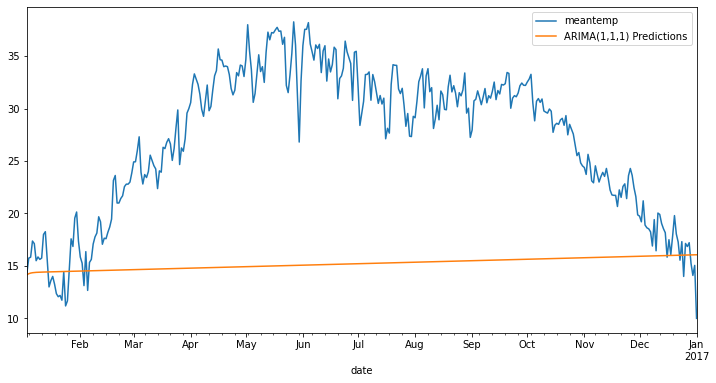

In [16]:
test_1['meantemp'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

# Resampling dataset monthly

In [17]:
monthly_temp = train['meantemp'].resample('MS').mean()

<AxesSubplot:xlabel='date'>

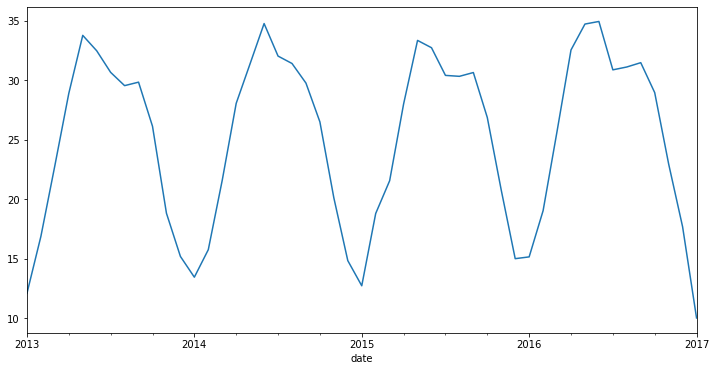

In [18]:
monthly_temp.plot(figsize=(12,6))

In [19]:
len(monthly_temp)
monthly_temp.head(10)

date
2013-01-01    12.074770
2013-02-01    16.867560
2013-03-01    22.814209
2013-04-01    28.895119
2013-05-01    33.776767
2013-06-01    32.480873
2013-07-01    30.663594
2013-08-01    29.547773
2013-09-01    29.840595
2013-10-01    26.129186
Freq: MS, Name: meantemp, dtype: float64

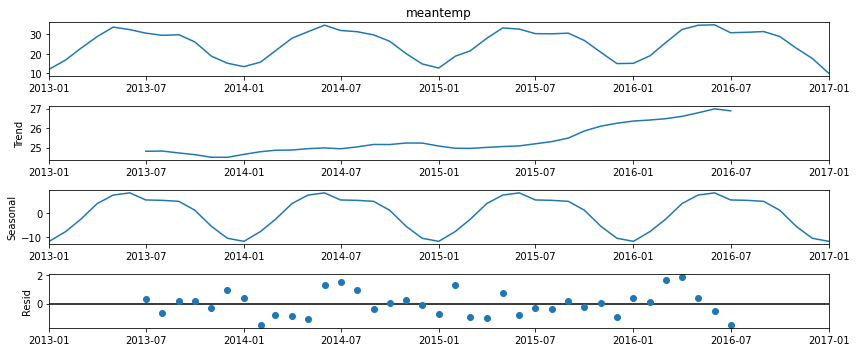

In [20]:
seasonal_decompose(monthly_temp).plot();

In [21]:
# Now again applying ADF test to check stationarity of data

In [22]:
check_adfuller(monthly_temp)

adf value        -1.046220
p-value           0.736036
# lags           10.000000
# observation    38.000000
critical 1%      -3.615509
critical 5%      -2.941262
critical 10%     -2.609200
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# Running Pmdarima.auto_arima model to get lower AIC (Akaike information criterion)

In [23]:
auto_arima(monthly_temp,seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   49
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 -68.565
Date:                                 Tue, 11 Jan 2022   AIC                            147.131
Time:                                         18:42:40   BIC                            155.185
Sample:                                              0   HQIC                           149.970
                                                  - 49                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5113      0.214      2.387      0.017       0.092       0.931
ma.L1          0.4029      0.241      1.670      0.095      -0.070       0.876
ma.S.L12      -1.0644      0.616     -1.727      0.084      -2.272       0.144
ma.S.L24       0.6056      1.942      0.312      0.755      -3.201       4.413
sigma2         1.5569      1.628      0.956      0.339      -1.635       4.748
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                11.66
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               3.54   Skew:                            -0.90
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
train_data_1=monthly_temp[:-14]
test_data_1=monthly_temp[-14:]

In [25]:
model_arima=ARIMA(train_data_1,order=(1,1,1))
results=model_arima.fit()
results.summary()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.meantemp   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -85.375
Method:                       css-mle   S.D. of innovations              2.949
Date:                Tue, 11 Jan 2022   AIC                            178.749
Time:                        18:42:40   BIC                            184.854
Sample:                    02-01-2013   HQIC                           180.831
                         - 11-01-2015                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1558      1.401      0.111      0.911      -2.591       2.902
ar.L1.D.meantemp     0.5617      0.185      3.043      0.002       0.200       0.924
ma.L1.D.meantemp     0.2659      0.182      1.461      0.144      -0.091       0.623
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7802           +0.0000j            1.7802            0.0000
MA.1           -3.7604           +0.0000j            3.7604            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
predictions = results.predict(start=len(train_data_1), end=len(train_data_1)+len(test_data_1)-1, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

<AxesSubplot:xlabel='date'>

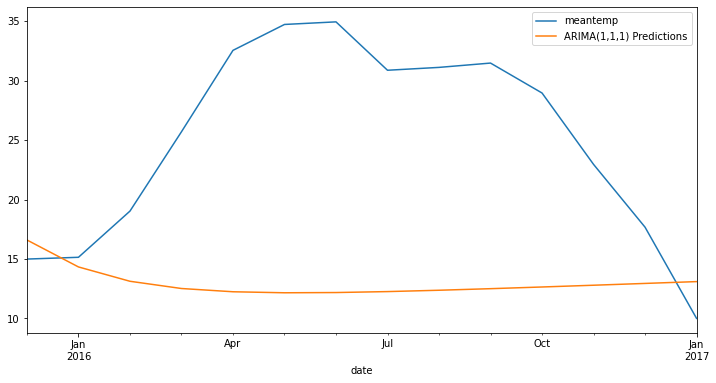

In [27]:
test_data_1.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [28]:
# Using SARIMAX model
model = SARIMAX(train_data_1,order=(2,0,2), seasonal_order=(2,1,[],12), m=12)
result = model.fit()
result.summary()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            meantemp   No. Observations:                   35
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                 -36.039
Date:                             Tue, 11 Jan 2022   AIC                             86.078
Time:                                     18:42:41   BIC                             94.027
Sample:                                 01-01-2013   HQIC                            88.077
                                      - 11-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9389      1.336      0.703      0.482      -1.679       3.557
ar.L2         -0.3275      1.403     -0.233      0.815      -3.078       2.423
ma.L1         -0.8460      1.416     -0.597      0.550      -3.622       1.930
ma.L2          0.1502      1.764      0.085      0.932      -3.307       3.607
ar.S.L12      -1.4713     10.617     -0.139      0.890     -22.280      19.338
ar.S.L24      -0.9640     14.187     -0.068      0.946     -28.771      26.843
sigma2         0.0615     23.787      0.003      0.998     -46.561      46.684
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.76   Prob(JB):                         0.93
Heteroskedasticity (H):               0.48   Skew:                             0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
start=len(train_data_1)
end=len(train_data_1)+len(test_data_1)-1
predictions = results.predict(start=start, end=end).rename('SARIMAX(2, 0, 2)x(2, 1, [], 12) Predictions')

In [38]:
print(predictions,monthly_temp)

date
2015-12-01    15.238753
2016-01-01    13.252142
2016-02-01    16.810804
2016-03-01    23.819931
2016-04-01    31.148959
2016-05-01    34.657277
2016-06-01    34.777099
2016-07-01    30.678773
2016-08-01    29.729790
2016-09-01    30.149094
2016-10-01    28.470877
2016-11-01    22.061059
2016-12-01    16.114947
2017-01-01    13.661571
Freq: MS, Name: SARIMAX(2, 0, 2)x(2, 1, [], 12) Predictions, dtype: float64 date
2013-01-01    12.074770
2013-02-01    16.867560
2013-03-01    22.814209
2013-04-01    28.895119
2013-05-01    33.776767
2013-06-01    32.480873
2013-07-01    30.663594
2013-08-01    29.547773
2013-09-01    29.840595
2013-10-01    26.129186
2013-11-01    18.811706
2013-12-01    15.179339
2014-01-01    13.431836
2014-02-01    15.746811
2014-03-01    21.593318
2014-04-01    28.058333
2014-05-01    31.405530
2014-06-01    34.770833
2014-07-01    32.034163
2014-08-01    31.411968
2014-09-01    29.762500
2014-10-01    26.496544
2014-11-01    20.104167
2014-12-01    14.823733
20

<AxesSubplot:xlabel='date'>

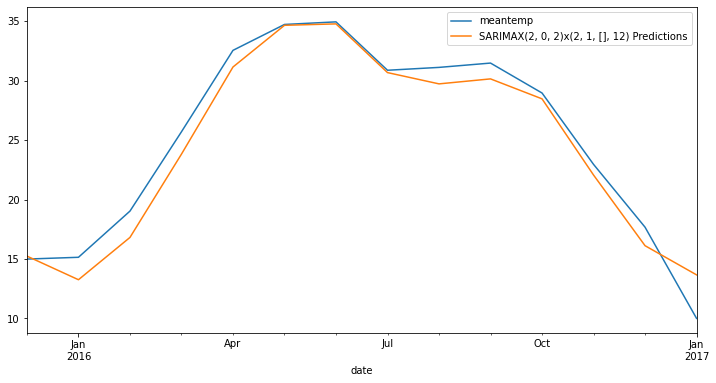

In [39]:
test_data_1.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [42]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_data_1, predictions)
print('Mean Squared Error ',error)

Mean Squared Error  2.4767988586015655


In [43]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data_1, predictions)
print('Root Mean Squared Error ',error)

Root Mean Squared Error  1.5737848832040437


In [44]:
accuracy=predictions.mean()/monthly_temp.mean()
print(accuracy)

0.9667335421381578


In [45]:
model = SARIMAX(monthly_temp,order=(2,0,2), seasonal_order=(2,1,0,12), m=12)
results = model.fit()
forecast = results.predict(len(monthly_temp)-1,len(monthly_temp)+11,dynamic=True).rename('SARIMA(2,0,2)(2,1,0,12) Forecast')

<AxesSubplot:xlabel='date'>

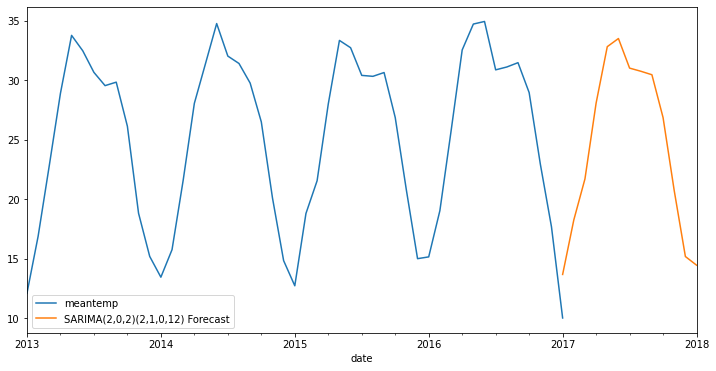

In [46]:
monthly_temp.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True,figsize=(12,6))
